<a href="https://colab.research.google.com/github/ilham3169/ML/blob/main/california_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor


In [ ]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv

--2024-06-19 12:29:46--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2024-06-19 12:29:46 (21.3 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
house = pd.read_csv('housing.csv')
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


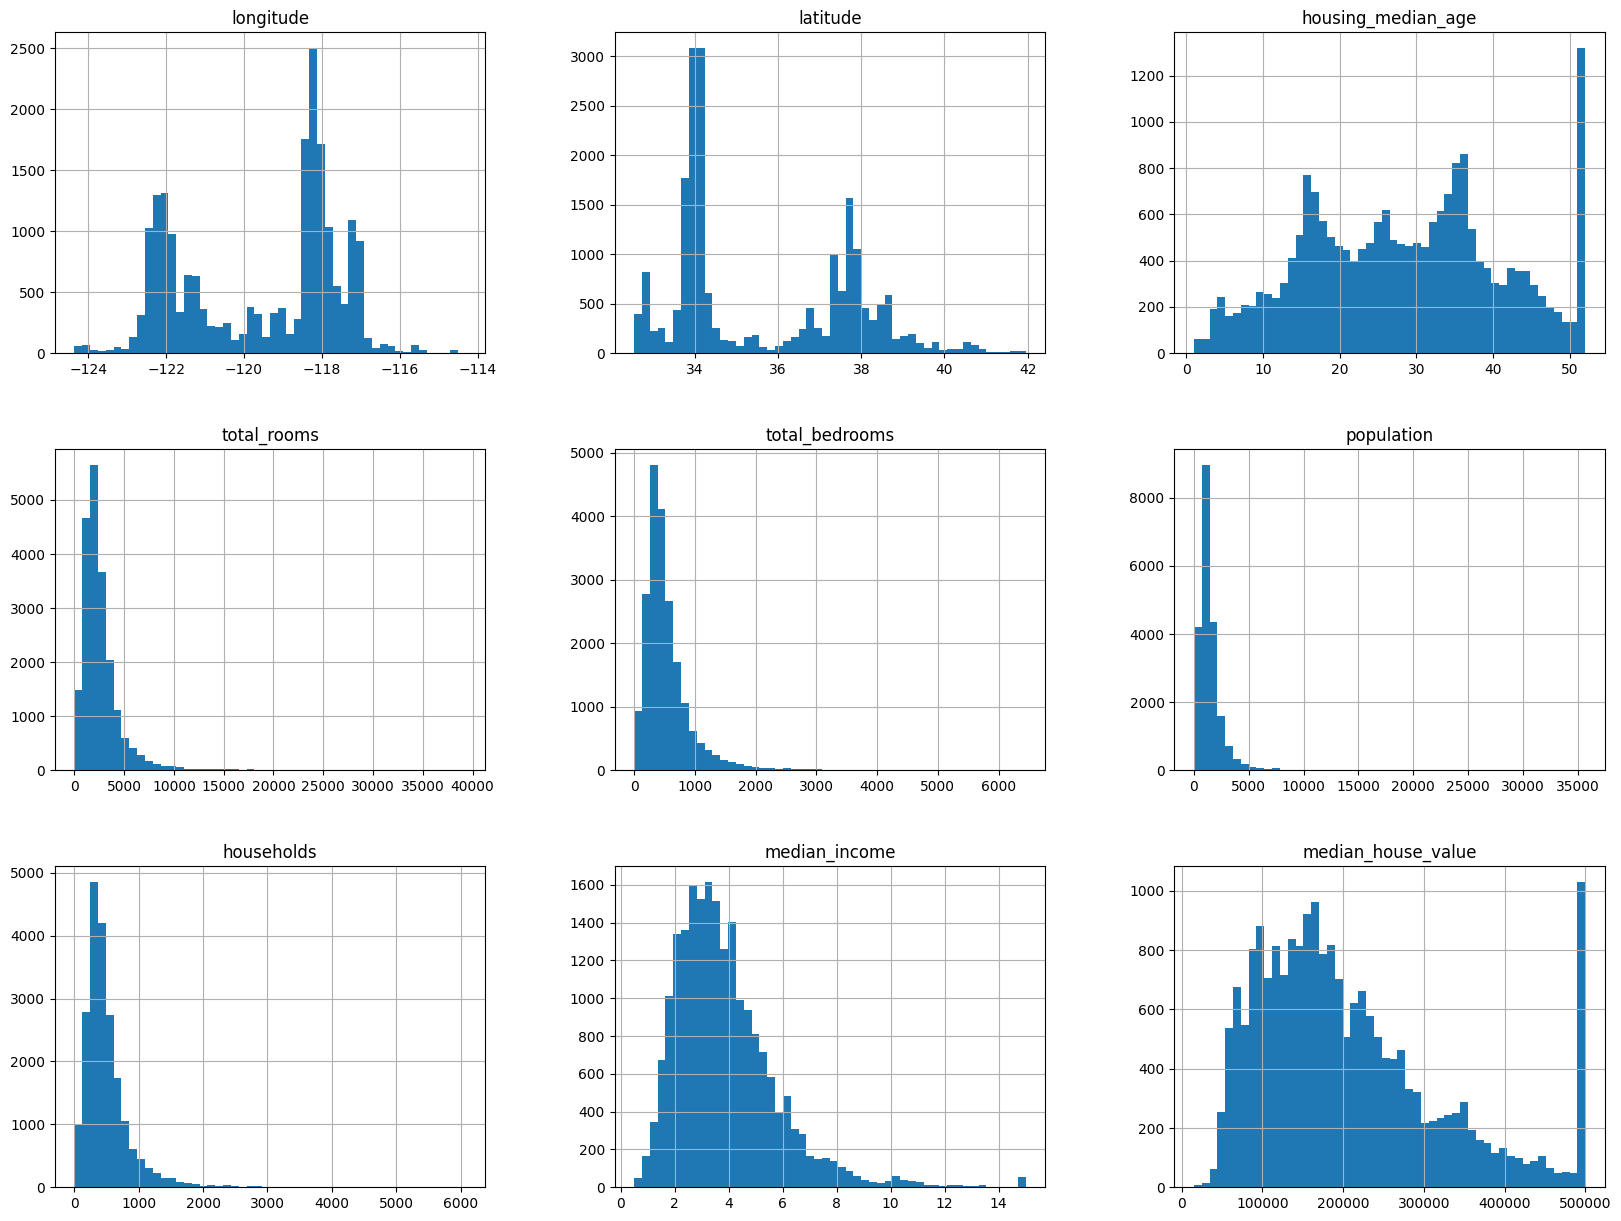

In [ ]:
house.hist(bins = 50, figsize = (20,15))
plt.show()

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 7.000e+00, 0.000e+00, 6.000e+00, 5.000e+00, 1.400e+01,
        7.000e+00, 1.700e+01, 9.000e+00, 1.500e+01, 2.300e+01, 2.500e+01,
        2.900e+01, 2.300e+01, 3.200e+01, 5.300e+01, 4.900e+01, 6.700e+01,
        1.030e+02, 1.110e+02, 1.650e+02, 2.390e+02, 3.580e+02, 5.560e+02,
        8.910e+02, 1.466e+03, 1.996e+03, 2.329e+03, 2.498e+03, 2.384e+03,
        2.020e+03, 1.605e+03, 1.128e+03, 7.650e+02, 5.240e+02, 3.550e+02,
        2.310e+02, 1.220e+02, 9.100e+01, 5.200e+01, 2.300e+01, 2.000e+01,
        8.000e+00, 4.000e+00]),
 array([0.        , 0.1754212 , 0.3508424 , 0.52626359, 0.70168479,
        0.87710599, 1.05252719, 1.22794839, 1.40336959, 1.57879078,
        1.75421198, 1.92963318, 2.10505438, 2.28047558, 2.45589678,
        2.63131797, 2.80673917, 2.98216037, 3.15758157, 3.33300277,
        3.50842397, 3.68384516, 3.85926636, 4.03468756, 4.21010876,
        4.38552996, 4.56095116, 4.73

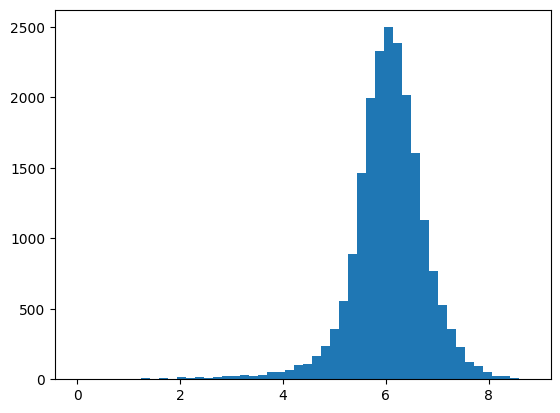

In [ ]:
plt.hist(np.log(house['total_bedrooms']), bins = 50)

In [ ]:
X,y = house.drop("median_house_value", axis = 1), house['median_house_value'].copy()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [ ]:
num_features = X_train.select_dtypes(include = [np.number]).columns

In [ ]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('scale', StandardScaler())
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features)
])

full_pipeline = Pipeline([
    ('preprocess', transformer),
    ('rfr', RandomForestRegressor())
])

In [ ]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object'))])),
                ('rfr', RandomForestRegressor())])

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV


# # param_grid = {
# #     'rfr__n_estimators' : [50, 100, 150],
# #     'rfr__criterion' : ['squared_error', 'absolute_errors', 'friedman_mse', 'poisson'],
# #     'rfr__n_jobs' : [-1]
# # }

# param_grid = {"rfr__n_jobs" : [-1],
#               "rfr__n_estimators" : [150],
#               "rfr__criterion" : ["squared_error"]}

# randCV = RandomizedSearchCV(full_pipeline, param_grid, cv = 5)
# randCV.fit(X_train, y_train)

# print(randCV.score(X_test, y_test))
# randCV.score(X_train, y_train)
# # param_grid = {
# #     'n_estimators' : [100, 200, 300],Accepted
# #     'min_samples_split': [2, 10, 20],
# #     'min_samples_leaf': [2, 5, 10],
# #     'max_features': ['auto', 'sqrt', 'log2']
# # }

# # random_search = RandomizedSearchCV(rnd_reg, param_grid, cv = 3, scoring = 'neg_mean_squared_error')
# # random_search.fit(X_trained_transformed[:1000], y_train[:1000])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.8185183528571672


0.9749643920793868

In [ ]:
# randCV.best_params_

{'rfr__n_jobs': -1,
 'rfr__n_estimators': 150,
 'rfr__criterion': 'squared_error'}

In [ ]:
# randCV.best_params_

{'rfr__n_jobs': -1,
 'rfr__n_estimators': 150,
 'rfr__criterion': 'squared_error'}

<Axes: >

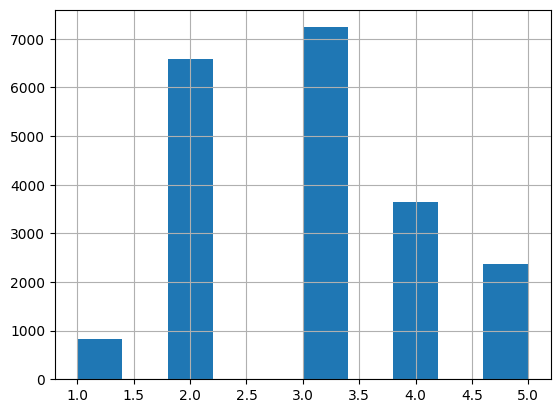

In [ ]:
house['income_cat'] = pd.cut(house['median_income'],
                             bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
                             labels = [1, 2, 3, 4, 5])
house['income_cat'].hist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = house['income_cat'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 9), (5160, 9), (15480,), (5160,))

In [ ]:
house.corr(numeric_only = True)['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

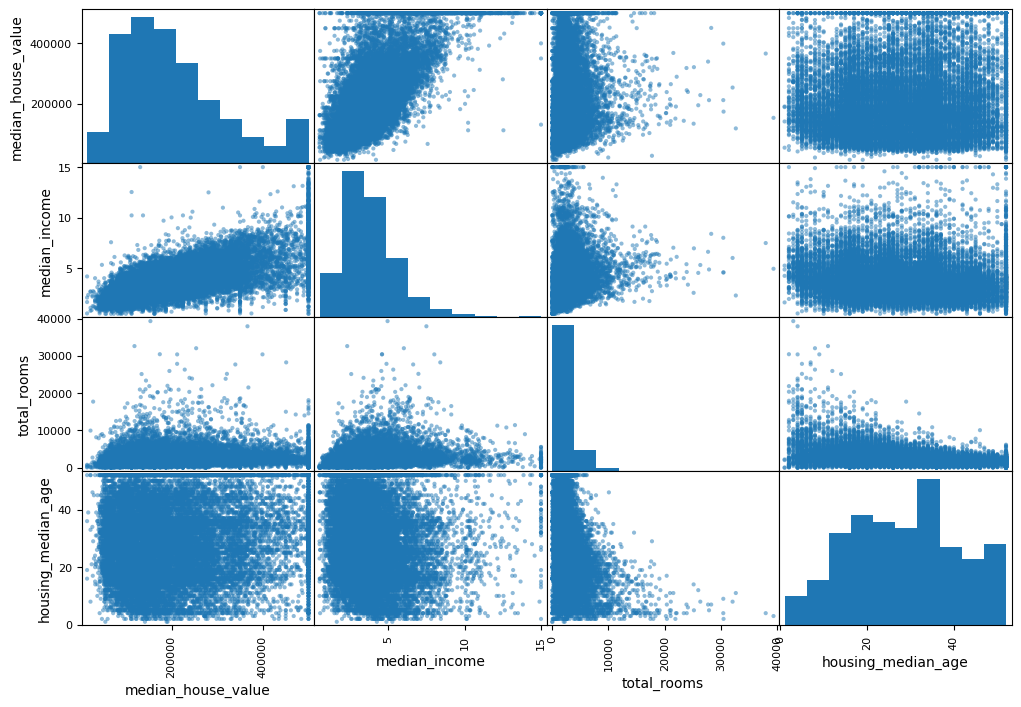

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(house[attributes], figsize = (12,8))

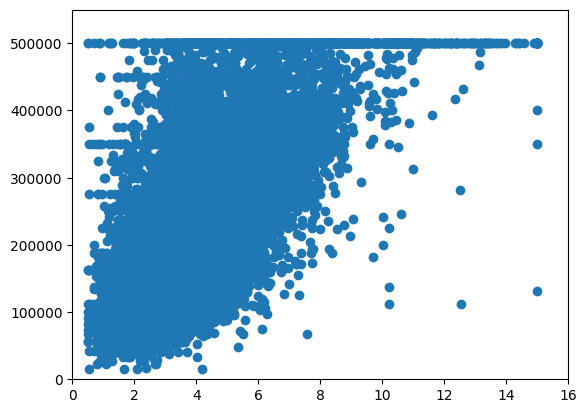

In [ ]:
plt.scatter(house['median_income'], house['median_house_value'])
plt.axis([0,16,0,550000])
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

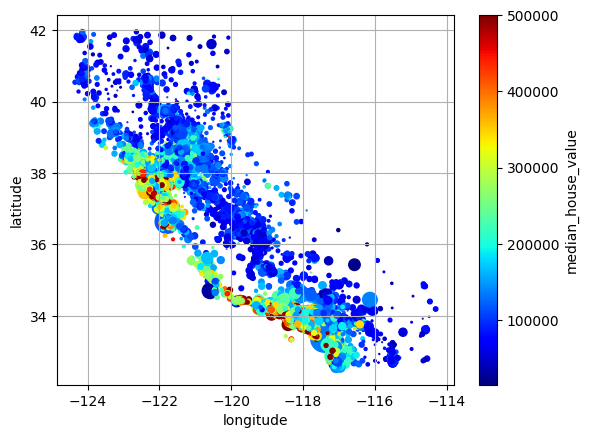

In [ ]:
# plt.scatter(house.longitude, house.latitude)
house.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, c = 'median_house_value', cmap = 'jet', colorbar = True, s = house['population']/100)

In [ ]:
house['rooms_per_house'] = house['total_rooms'] / house['households']
house['bedrooms_ration'] = house['total_bedrooms'] / house['total_rooms']
house['people_per_house'] = house['population'] / house['households']

In [ ]:
house.corr(numeric_only = True)['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ration      -0.255880
Name: median_house_value, dtype: float64

In [ ]:
X = house.drop("median_house_value", axis = 1)
y = house['median_house_value'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = house['income_cat'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 13), (5160, 13), (15480,), (5160,))

In [ ]:
X_train = X_train.drop("income_cat", axis = 1)
X_test = X_test.drop("income_cat", axis = 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'rooms_per_house'}>,
        <Axes: title={'center': 'bedrooms_ration'}>,
        <Axes: title={'center': 'people_per_house'}>]], dtype=object)

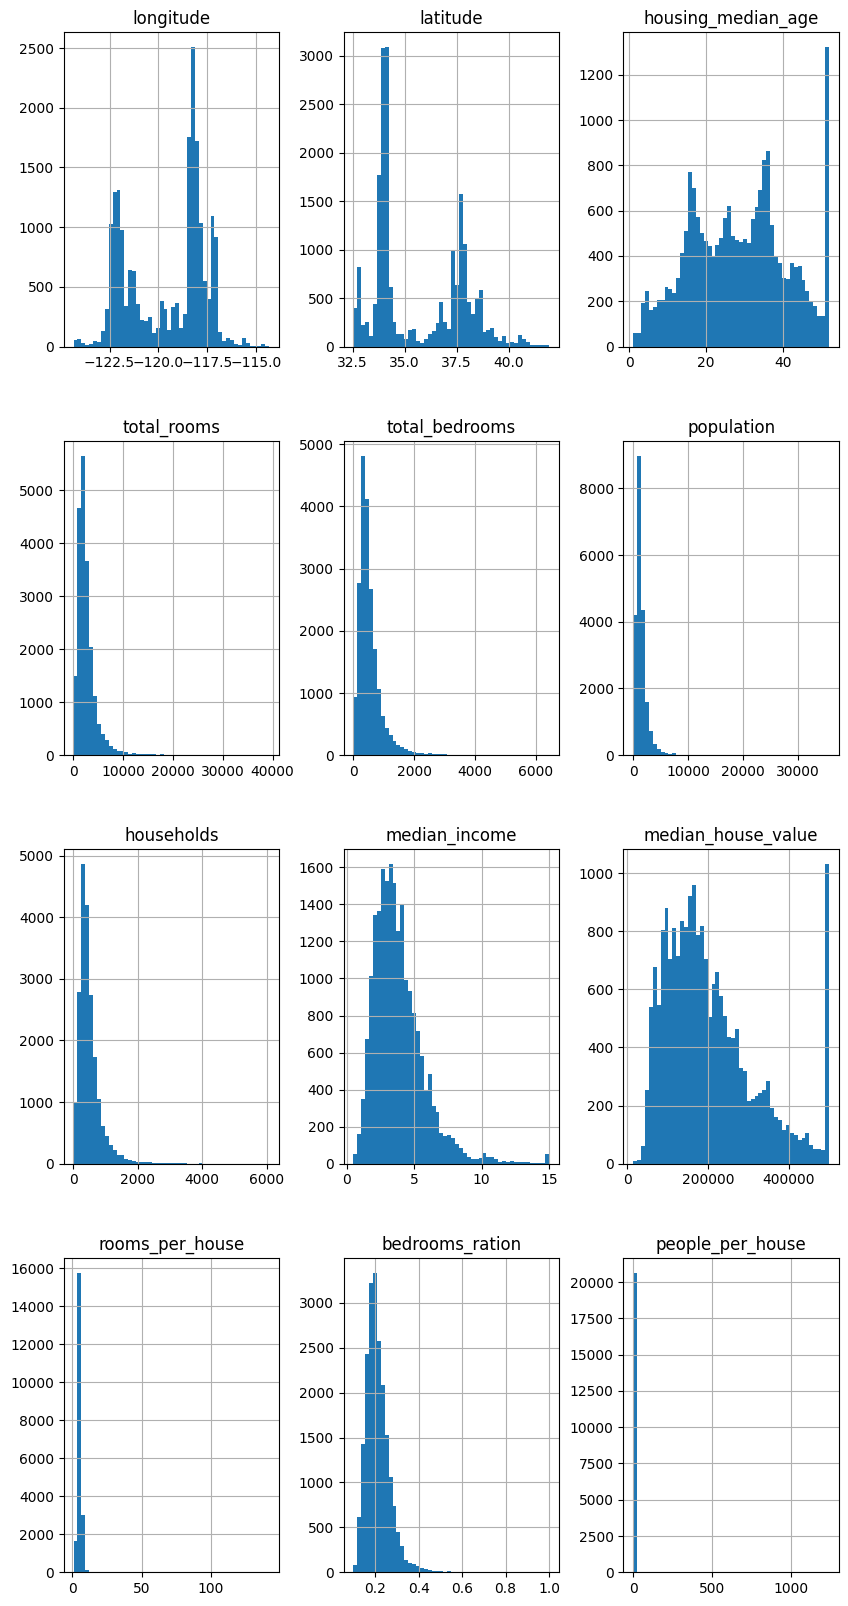

In [ ]:
house.hist(bins = 50, figsize = (10,20))

In [ ]:
#total_rooms, total_bedrooms, population, median_house_value

In [ ]:
house = house.drop(house[house['median_house_value'] > 500000].index)

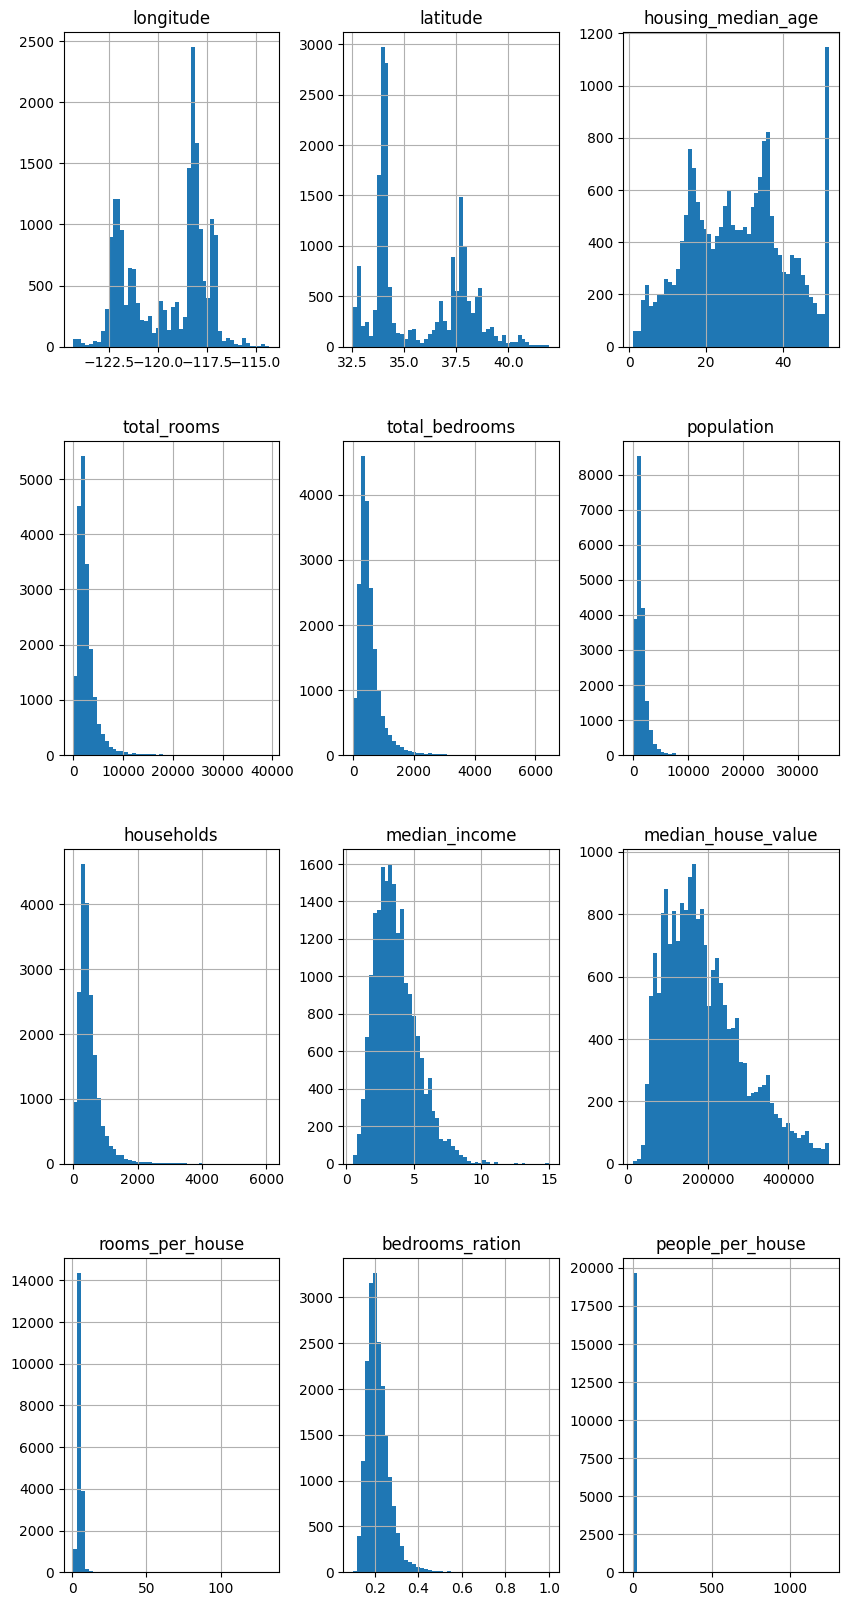

In [ ]:
house.hist(bins = 50, figsize = (10,20))
plt.show()

In [ ]:
house = house.drop(house[house['housing_median_age'] > 50].index)


[]

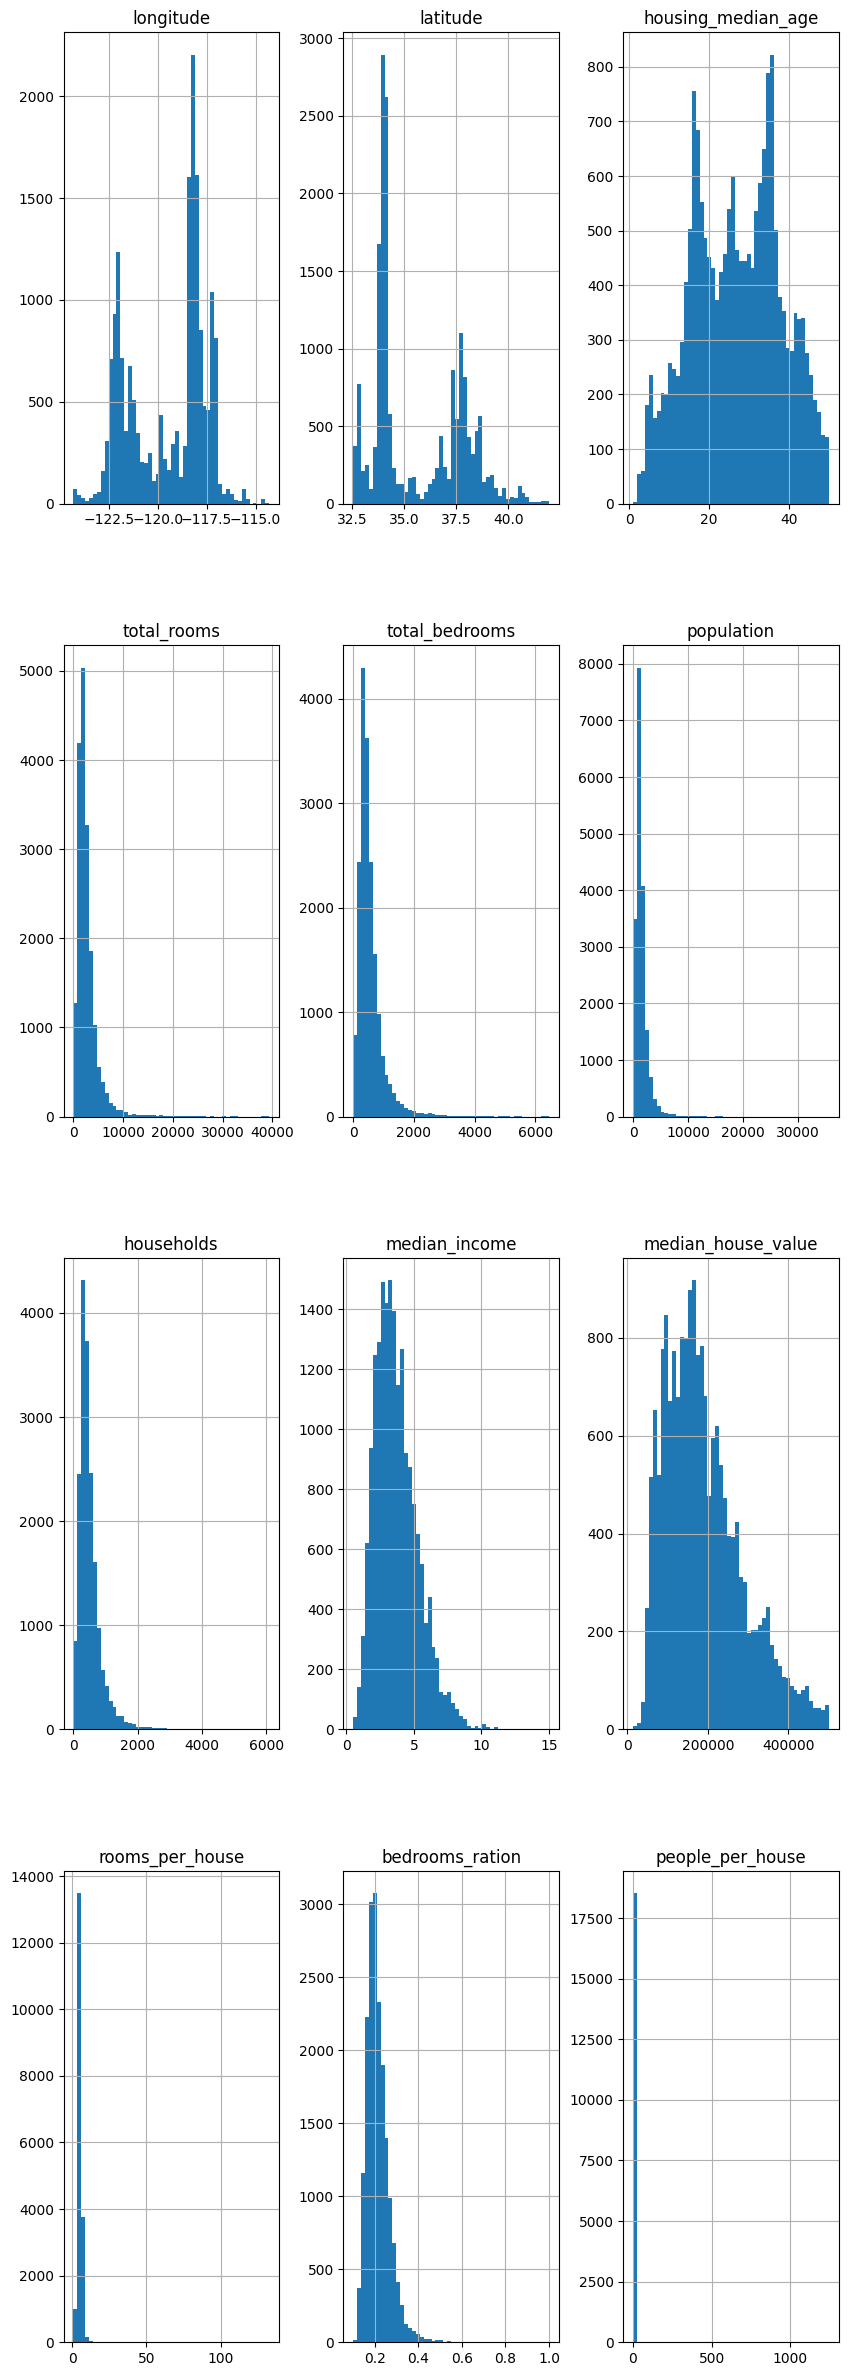

In [ ]:
house.hist(bins = 50, figsize = (10,30))
plt.plot()

In [ ]:
house['total_bedrooms'] = np.log(house['total_bedrooms'])

In [ ]:
house['total_rooms'] = np.log(house['total_rooms'])

In [ ]:
house['population'] = np.log(house['population'])

In [ ]:
house['households'] = np.log(house['households'])

In [ ]:
house['bedrooms_ration'] = np.log(house['bedrooms_ration'])

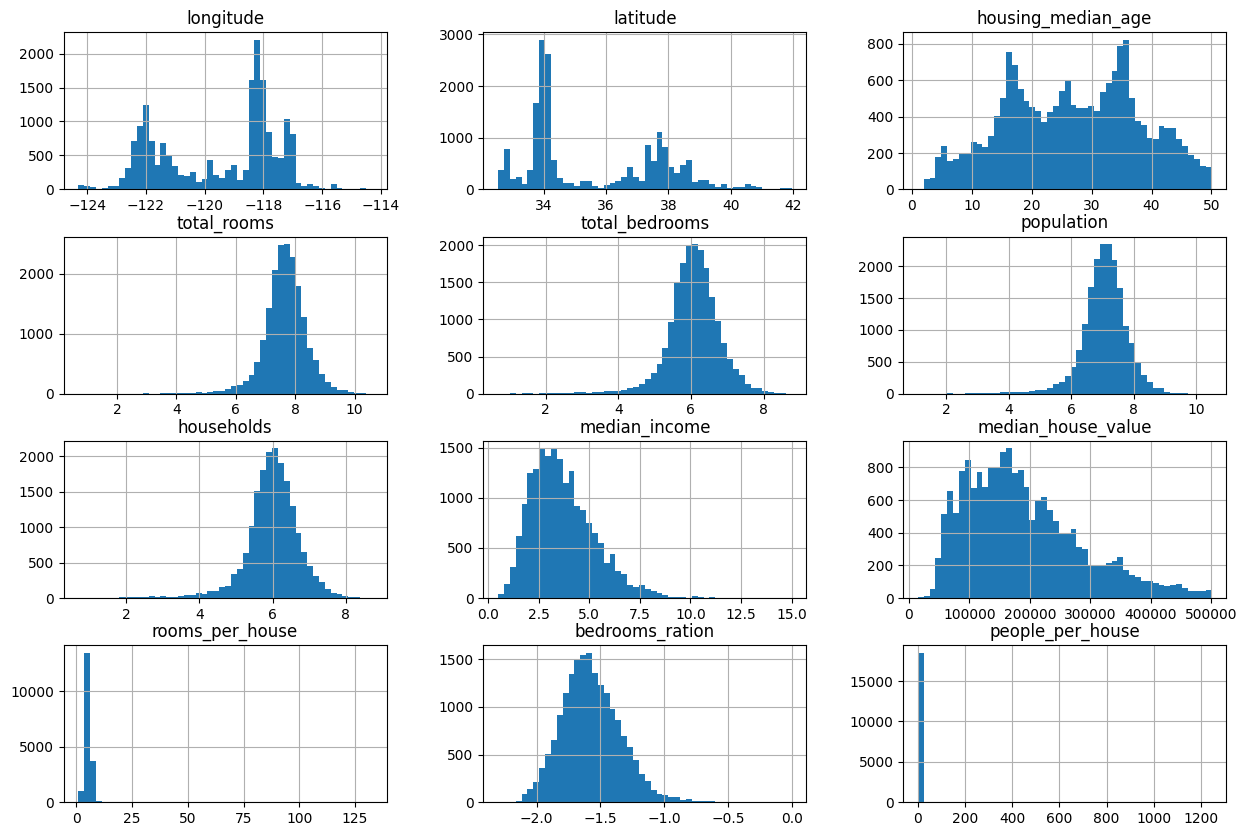

In [ ]:
house.hist(bins = 50, figsize = (15, 10));

In [ ]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        192
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
rooms_per_house         0
bedrooms_ration       192
people_per_house        0
dtype: int64

In [ ]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('scater', StandardScaler())
])

In [ ]:
transformer = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_features)
])

In [ ]:
X_trained_transformed = transformer.fit_transform(X_train)
featured_names = transformer.get_feature_names_out()
X_trained_transformed_df = pd.DataFrame(X_trained_transformed, columns = featured_names)

In [ ]:
X_test_transformed = transformer.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns = featured_names )

In [ ]:
rnd_reg = RandomForestRegressor()
rnd_reg.fit(X_trained_transformed_df, y_train)

RandomForestRegressor()

In [ ]:
rnd_reg.score(X_test_transformed_df, y_test)

0.8060934356597583

In [ ]:
X = house.drop('median_house_value', axis = 1)
y = house['median_house_value'].copy()

In [ ]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        192
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
rooms_per_house         0
bedrooms_ration       192
people_per_house        0
dtype: int64

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.5)

In [ ]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns
cat_features


Index(['ocean_proximity', 'income_cat'], dtype='object')

In [ ]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('scater', StandardScaler())
])

transformer = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_features)
])



In [ ]:
X_trained_transformed = transformer.fit_transform(X_train)
featured_names = transformer.get_feature_names_out()
X_trained_transformed_df = pd.DataFrame(X_trained_transformed, columns = featured_names)

In [ ]:
X_test_transformed = transformer.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns = featured_names )

In [ ]:
rnd_reg = RandomForestRegressor()
rnd_reg.fit(X_trained_transformed_df, y_train)

RandomForestRegressor()

In [ ]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('scater', StandardScaler())
])

In [ ]:
rnd_reg.score(X_test_transformed_df, y_test)

0.764920393120392

In [ ]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        192
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
rooms_per_house         0
bedrooms_ration       192
people_per_house        0
dtype: int64

In [ ]:
rnd_reg.score(X_trained_transformed_df, y_train)

0.9669639757197779

In [ ]:
from sklearn.metrics import mean_squared_error
for i in range (50,150,20):
  rnd_reg = RandomForestRegressor(n_estimators = i)
  rnd_reg.fit(X_trained_transformed, y_train)
  preds = rnd_reg.predict(X_test_transformed)
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  print(f"n_estimators = {i}, rmse = {rmse}")

n_estimators = 50, rmse = 46794.201014843544
n_estimators = 70, rmse = 46677.76699387511
n_estimators = 90, rmse = 46389.30135203248
n_estimators = 110, rmse = 46579.47273223693
n_estimators = 130, rmse = 46374.68088651478


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rnd_reg, X_trained_transformed, y_train, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([47670.09299452, 45946.68506273, 48486.72741658, 45458.27088784,
       47672.87426658])

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators' : [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [2, 5, 10],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(rnd_reg, param_grid, cv = 3, scoring = 'neg_mean_squared_error')
# # grid_search.fit(X_trained_transformed[:1000], y_train[:1000])

In [ ]:
# from sklearn.ensemble import IsolationForest

# isolation_forest = IsolationForest(random_state = 42)
# outlier_pred = isolation_forest.fit_predict(X_trained_transformed)

In [ ]:
# outlier_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# X_trained_transformed = X_trained_transformed_df.iloc[outlier_pred == 1]
# y_train = y_train.iloc[outlier_pred == 1]

In [ ]:
# param_grid = {
#     'n_estimators' : [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [2, 5, 10],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

In [ ]:
# full_pipeline.fit(X_train, y_train)

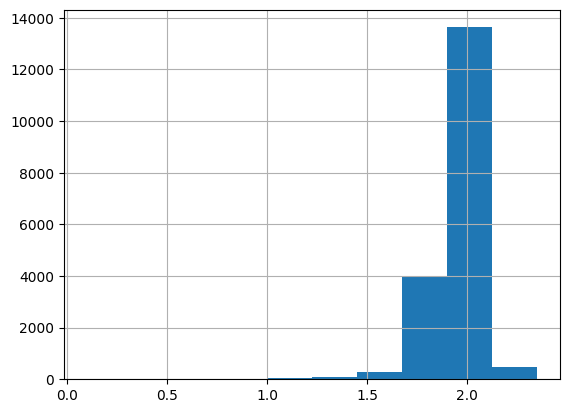

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(house['population'])
log_pop.hist();

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv


X,y = house.drop('median_house_value', axis = 1), house['median_house_value'].copy()
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], remainder=default_num_pipeline)



--2024-06-19 12:57:25--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2024-06-19 12:57:25 (20.6 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
X_train_transformed = preprocessing.fit_transform(X_train)
X_test_transformed = preprocessing.transform(X_test)

feature_names = preprocessing.get_feature_names_out()
X_train_transformed = pd.DataFrame(X_train_transformed, columns = feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns = feature_names)

X_train_transformed

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__income_cat,remainder__rooms_per_house,remainder__bedrooms_ration,remainder__people_per_house
0,-0.216656,0.253774,-0.289576,0.534415,0.764371,0.387744,0.452383,1.255597,1.0,0.0,0.0,0.0,0.0,-1.268595,0.736043,0.881531,1.033255,0.605916,-0.877367,-0.035795
1,0.394481,-0.390017,-1.087792,-0.056038,-0.252306,-0.697821,-0.015225,0.893963,0.0,0.0,0.0,1.0,0.0,-1.480274,1.019885,-0.170514,1.033255,-0.459735,0.641762,-0.117910
2,-0.460037,0.323269,0.066231,-0.093901,0.071906,-0.081240,-0.111377,0.364472,0.0,0.0,0.0,0.0,1.0,1.190912,-1.302031,0.706190,0.041550,0.299797,-0.625715,-0.012858
3,1.563192,-0.997678,-0.843030,1.595096,1.363831,1.352560,1.531265,0.245034,0.0,0.0,0.0,0.0,1.0,0.686915,-0.841370,-0.608867,0.041550,-0.521278,1.123218,-0.072048
4,-0.499352,-0.065413,-0.075347,-0.209217,-0.057433,-0.062216,-0.024766,0.010088,0.0,1.0,0.0,0.0,0.0,1.059873,-0.757614,1.845907,0.041550,-0.126471,-0.570839,-0.026395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14817,-0.834646,0.390926,0.036206,0.007091,0.368597,0.139425,0.084243,1.380303,1.0,0.0,0.0,0.0,0.0,0.283717,-0.659898,-0.784208,2.024960,0.533805,-1.341154,-0.009032
14818,0.161031,-0.209014,-0.556984,0.007091,-0.071650,-0.292077,0.034213,-1.025082,0.0,1.0,0.0,0.0,0.0,-0.986357,1.364217,0.618520,-0.950156,-0.255965,0.238843,-0.074451
14819,1.651099,-1.108445,-0.729858,1.227885,0.860671,1.024925,1.203002,0.183148,0.0,0.0,0.0,1.0,0.0,-1.339155,0.866331,0.267838,0.041550,-0.743668,1.539315,-0.066446
14820,0.613812,-0.361104,1.071397,-0.136520,-0.448020,0.427951,-0.179577,-0.417176,0.0,0.0,0.0,1.0,0.0,-1.364355,0.870984,0.881531,-0.950156,-0.494443,1.024521,0.136950


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
models = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

for model in models:
  model.fit(X_train_transformed, y_train)
  print(model.__class__.__name__, model.score(X_test_transformed, y_test))

LinearRegression 0.6279228013560096
SVR -0.012562524011982656
DecisionTreeRegressor 0.5626571571063
RandomForestRegressor 0.7819453185032301
GradientBoostingRegressor 0.7582355482974019


In [ ]:
random_forest_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor())
])

random_forest_pipeline.fit(X_train, y_train)
random_forest_pipeline.score(X_test, y_test)

0.7821516485804437